# Step -1 : Importing Libraries and Read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.font_manager import FontProperties
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from mlxtend.regressor import StackingRegressor

In [2]:
df= pd.read_csv("Apps_data.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [7]:
df.shape

(10841, 13)

# Step 2 : Data Cleansing and Exploratory Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

483

In [10]:
duplicate=df[df.duplicated()]
duplicate.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [11]:
df=df.drop_duplicates()

In [12]:
df['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [13]:
df.drop_duplicates('App',inplace=True)

In [14]:
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(9660, 13)

In [17]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [18]:
df=df.drop(df[df['Category']=='1.9'].index) 

In [19]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df['Rating'].isna().sum()/df.shape[0]*100

15.146495496428203

In [22]:
df=df.dropna()

In [23]:
df.isna().sum()/df.shape[0]*100

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
rating_category=[]
for row in df['Rating']:
    if row >=3.5:
        rating_category.append('high')
    else:
        rating_category.append('low')

In [26]:
df['Rating_Category']= rating_category

In [27]:
df['Rating_Category'].describe(include='O')

count     8190
unique       2
top       high
freq      7473
Name: Rating_Category, dtype: object

In [28]:
df['Rating_Category'].value_counts()

high    7473
low      717
Name: Rating_Category, dtype: int64

In [29]:
df['Rating_Category'].describe()

count     8190
unique       2
top       high
freq      7473
Name: Rating_Category, dtype: object

<AxesSubplot:>

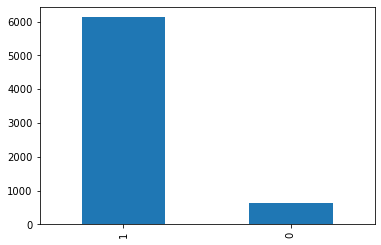

In [94]:
df['Rating_Category'].value_counts().plot(kind='bar')

- We can see that majority of the values in Rating Category are 1 i.e high (more than or equal to 3.5). 
- It is highly imbalanced.

In [30]:
df=df.drop(['Rating'], axis=1)

In [31]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [32]:
df.describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
count,8190,8190,8190,8190,8190,8190,8190,8190,8190,8190,8190,8190,8190
unique,8190,33,5319,413,19,2,73,6,114,1299,2624,31,2
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,high
freq,1,1607,82,1169,1414,7588,7588,6612,716,245,1011,1811,7473


In [33]:
df['Reviews'] = df['Reviews'].apply(pd.to_numeric)

In [34]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [35]:
df.describe()

,Reviews
count,8.190000e+03
mean,2.554354e+05
std,1.986309e+06
min,1.000000e+00
25%,1.260000e+02
50%,3.009500e+03
75%,4.391425e+04
max,7.815831e+07


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

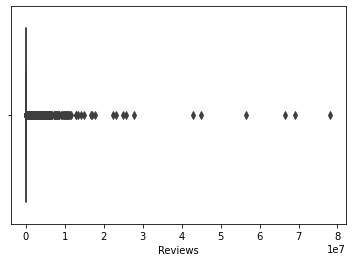

In [36]:
sns.boxplot(df['Reviews'])

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

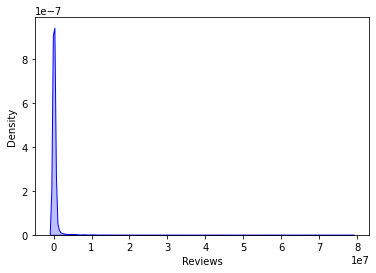

In [37]:
sns.kdeplot(df.Reviews, color="blue", shade = True)

In [38]:
df_log = df.copy()
df_log['Reviews']  = np.log(df_log['Reviews'])
df_log.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

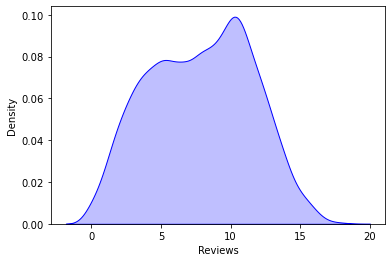

In [39]:
sns.kdeplot(df_log.Reviews, color="blue", shade = True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

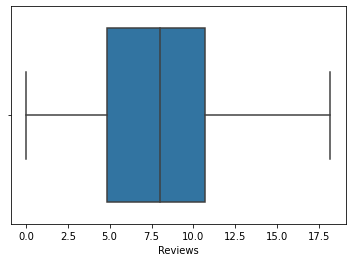

In [40]:
sns.boxplot(df_log.Reviews)

In [41]:
df=df_log

In [42]:
size=[]
for row in df['Size']:
    if row.find('M')!=-1:
        j=row.split('M')
        g=float(j[0])*1000000
        size.append(g)
    elif row.find('K')!=-1:
        j=row.split('K')
        g=float(j[0])*1000
        size.append(g)
    else:
        g=0
        size.append(g)

In [43]:
size

[19000000.0,
 14000000.0,
 8700000.0,
 25000000.0,
 2800000.0,
 5600000.0,
 19000000.0,
 29000000.0,
 33000000.0,
 3100000.0,
 28000000.0,
 12000000.0,
 20000000.0,
 21000000.0,
 37000000.0,
 5500000.0,
 17000000.0,
 39000000.0,
 31000000.0,
 14000000.0,
 12000000.0,
 4200000.0,
 23000000.0,
 6000000.0,
 25000000.0,
 6100000.0,
 4600000.0,
 4200000.0,
 9200000.0,
 5200000.0,
 11000000.0,
 11000000.0,
 4200000.0,
 9200000.0,
 24000000.0,
 0,
 11000000.0,
 9400000.0,
 15000000.0,
 10000000.0,
 0,
 1200000.0,
 12000000.0,
 24000000.0,
 26000000.0,
 8000000.0,
 7900000.0,
 25000000.0,
 56000000.0,
 57000000.0,
 0,
 35000000.0,
 33000000.0,
 33000000.0,
 5600000.0,
 54000000.0,
 0,
 3600000.0,
 5700000.0,
 17000000.0,
 8600000.0,
 2400000.0,
 27000000.0,
 2700000.0,
 2500000.0,
 0,
 0,
 7000000.0,
 35000000.0,
 16000000.0,
 16000000.0,
 0,
 17000000.0,
 3400000.0,
 8900000.0,
 3900000.0,
 2900000.0,
 38000000.0,
 32000000.0,
 37000000.0,
 15000000.0,
 5400000.0,
 18000000.0,
 0,
 38000000.0

In [44]:
df['Size']=size

In [45]:
df=df.drop(df[df['Size']==0].index) 

In [46]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [47]:
df['Installs'] = df['Installs'].str.replace('+', '')

C:\Users\user\AppData\Local\Temp\ipykernel_20736\126296622.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


In [48]:
df['Installs'] = df['Installs'].str.replace(',', '')

In [49]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [50]:
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [51]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [52]:
df['Price'].value_counts()

0          6277
$2.99        94
$0.99        91
$1.99        49
$4.99        48
           ... 
$1.59         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 66, dtype: int64

In [53]:
df['Price'] = df['Price'].str.replace('$', '')

C:\Users\user\AppData\Local\Temp\ipykernel_20736\961214681.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [54]:
df['Price'].value_counts()

0         6277
2.99        94
0.99        91
1.99        49
4.99        48
          ... 
1.59         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 66, dtype: int64

In [55]:
df['Price'] = pd.to_numeric(df['Price'])

In [56]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6766 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              6766 non-null   object 
 1   Category         6766 non-null   object 
 2   Reviews          6766 non-null   float64
 3   Size             6766 non-null   float64
 4   Installs         6766 non-null   int64  
 5   Type             6766 non-null   object 
 6   Price            6766 non-null   float64
 7   Content Rating   6766 non-null   object 
 8   Genres           6766 non-null   object 
 9   Last Updated     6766 non-null   object 
 10  Current Ver      6766 non-null   object 
 11  Android Ver      6766 non-null   object 
 12  Rating_Category  6766 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 740.0+ KB


# Step 3: Data Preparation

In [58]:
rating=[]

for row in df['Rating_Category']:
    if row=='high':
        rating.append(1)
    elif row=='low':
        rating.append(0)
    else:
        rating.append(NULL)

In [59]:
rating

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [60]:
df['Rating_Category']=rating

In [61]:
df['Rating_Category'].value_counts()

1    6128
0     638
Name: Rating_Category, dtype: int64

In [62]:
df['Rating_Category'].describe()

count    6766.000000
mean        0.905705
std         0.292260
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Rating_Category, dtype: float64

In [63]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [64]:
df.isna().sum()

App                0
Category           0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Rating_Category    0
dtype: int64

In [65]:
df=df.drop(['Category'], axis=1)

In [66]:
df.head()

,App,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",11.379508,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,12.281384,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,6.874198,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [67]:
df=df.drop(['Last Updated'], axis=1)

In [68]:
df=df.drop(['Current Ver'], axis=1)

In [69]:
df=df.drop(['Android Ver'], axis=1)

In [70]:
df=df.drop(['App'], axis=1)

In [71]:
df.head()

,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_Category
0,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,1
1,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1
2,11.379508,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1
3,12.281384,25000000.0,50000000,Free,0.0,Teen,Art & Design,1
4,6.874198,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1


In [72]:
df=df.drop(['Genres'], axis=1)

In [73]:
df.head()

,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,5.068904,19000000.0,10000,Free,0.0,Everyone,1
1,6.874198,14000000.0,500000,Free,0.0,Everyone,1
2,11.379508,8700000.0,5000000,Free,0.0,Everyone,1
3,12.281384,25000000.0,50000000,Free,0.0,Teen,1
4,6.874198,2800000.0,100000,Free,0.0,Everyone,1


In [74]:
Content = pd.get_dummies(df["Content Rating"])
df=pd.concat([df, Content], axis=1)
df=df.drop(['Content Rating'], axis=1)

In [75]:
df.head()

,Reviews,Size,Installs,Type,Price,Rating_Category,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,5.068904,19000000.0,10000,Free,0.0,1,0,1,0,0,0,0
1,6.874198,14000000.0,500000,Free,0.0,1,0,1,0,0,0,0
2,11.379508,8700000.0,5000000,Free,0.0,1,0,1,0,0,0,0
3,12.281384,25000000.0,50000000,Free,0.0,1,0,0,0,0,1,0
4,6.874198,2800000.0,100000,Free,0.0,1,0,1,0,0,0,0


In [76]:
Type = pd.get_dummies(df["Type"])
df=pd.concat([df, Type], axis=1)
df=df.drop(['Type'], axis=1)

In [77]:
df.head()

,Reviews,Size,Installs,Price,Rating_Category,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Free,Paid
0,5.068904,19000000.0,10000,0.0,1,0,1,0,0,0,0,1,0
1,6.874198,14000000.0,500000,0.0,1,0,1,0,0,0,0,1,0
2,11.379508,8700000.0,5000000,0.0,1,0,1,0,0,0,0,1,0
3,12.281384,25000000.0,50000000,0.0,1,0,0,0,0,1,0,1,0
4,6.874198,2800000.0,100000,0.0,1,0,1,0,0,0,0,1,0


In [78]:
df.describe()

,Reviews,Size,Installs,Price,Rating_Category,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Free,Paid
count,6766.000000,6.766000e+03,6.766000e+03,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000
mean,7.395406,2.257165e+07,4.622825e+06,1.133299,0.905705,0.000296,0.802394,0.038132,0.044783,0.114248,0.000148,0.927727,0.072273
std,3.596869,2.276795e+07,2.764262e+07,17.896307,0.292260,0.017192,0.398222,0.191529,0.206842,0.318135,0.012157,0.258959,0.258959
min,0.000000,1.000000e+06,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.488636,5.500000e+06,1.000000e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.477319,1.400000e+07,1.000000e+05,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10.271398,3.200000e+07,1.000000e+06,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,17.619764,1.000000e+08,1.000000e+09,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6766 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviews          6766 non-null   float64
 1   Size             6766 non-null   float64
 2   Installs         6766 non-null   int64  
 3   Price            6766 non-null   float64
 4   Rating_Category  6766 non-null   int64  
 5   Adults only 18+  6766 non-null   uint8  
 6   Everyone         6766 non-null   uint8  
 7   Everyone 10+     6766 non-null   uint8  
 8   Mature 17+       6766 non-null   uint8  
 9   Teen             6766 non-null   uint8  
 10  Unrated          6766 non-null   uint8  
 11  Free             6766 non-null   uint8  
 12  Paid             6766 non-null   uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 370.0 KB


In [80]:
df.head()

,Reviews,Size,Installs,Price,Rating_Category,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Free,Paid
0,5.068904,19000000.0,10000,0.0,1,0,1,0,0,0,0,1,0
1,6.874198,14000000.0,500000,0.0,1,0,1,0,0,0,0,1,0
2,11.379508,8700000.0,5000000,0.0,1,0,1,0,0,0,0,1,0
3,12.281384,25000000.0,50000000,0.0,1,0,0,0,0,1,0,1,0
4,6.874198,2800000.0,100000,0.0,1,0,1,0,0,0,0,1,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6766 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviews          6766 non-null   float64
 1   Size             6766 non-null   float64
 2   Installs         6766 non-null   int64  
 3   Price            6766 non-null   float64
 4   Rating_Category  6766 non-null   int64  
 5   Adults only 18+  6766 non-null   uint8  
 6   Everyone         6766 non-null   uint8  
 7   Everyone 10+     6766 non-null   uint8  
 8   Mature 17+       6766 non-null   uint8  
 9   Teen             6766 non-null   uint8  
 10  Unrated          6766 non-null   uint8  
 11  Free             6766 non-null   uint8  
 12  Paid             6766 non-null   uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 370.0 KB


In [82]:
y=df['Rating_Category']
X = df.drop(['Rating_Category'],axis=1)

In [83]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [84]:
df.to_csv('file_name.csv')

In [85]:
sc = StandardScaler()

X_train.iloc[:,:] = sc.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = sc.transform(X_test.iloc[:,:])

# Step 4: Model Train and Test

In [86]:
def model(rf):
    rf.fit(X_train,y_train)
    y_test_pred = rf.predict(X_test)
    y_train_pred = rf.predict(X_train)
    print("Train R2_score",r2_score(y_train,y_train_pred))
    print("Test R2_score",r2_score(y_test,y_test_pred))

## Decision Tree

In [87]:
model(DecisionTreeClassifier(criterion = 'gini', max_depth = 20))

Train R2_score 0.7200097228663849
Test R2_score -0.6543078651958891


## Random Forest

In [88]:
model(RandomForestRegressor())

Train R2_score 0.8415663449696988
Test R2_score -0.1155976068852409


## Bagging

In [89]:
model(BaggingClassifier(n_estimators=1000, max_samples=1.0 , oob_score=True))

Train R2_score 0.9722323692098894
Test R2_score -0.3042261177892902


## Boosting

### ADA Boosting

In [90]:
model(AdaBoostRegressor(random_state=500, learning_rate=0.001))

Train R2_score 0.05792074461555252
Test R2_score 0.046555229816446


### Gradient Boosting

In [91]:
model(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=20))

Train R2_score 0.9722323692098894
Test R2_score -0.6199861252540657


## Stacked Classifier

In [92]:
model(StackingRegressor(regressors=[LinearRegression(),DecisionTreeRegressor(max_depth=7),AdaBoostRegressor()],
                       meta_regressor = RandomForestRegressor(n_estimators=30)))

Train R2_score 0.7995524181606836
Test R2_score -0.35932662619991973


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature nam

# Conclusions

- We can see that the train acccuracy of the Models are good, with the highest being Bagging and Gradient Boosting and the lowest being ADA Boosting

- The train accuracy of the models is very bad going into negative with the worst being Decision Tree and the best being ADA Boosting

- Bad accuracy is a result of the over fit of the data

- To over come the overfitting we can use early stopping,  Feature Engineering and Regularization